# Praktikum 1

In [23]:
# Instalasi pustaka hdbscan (tidak tersedia default di sklearn)
%pip install hdbscan

# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

Note: you may need to restart the kernel to use updated packages.


## Langkah 2: Definisi Fungsi Visualisasi

In [24]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

## Langkah 3: Membuat Dataset Sintetis

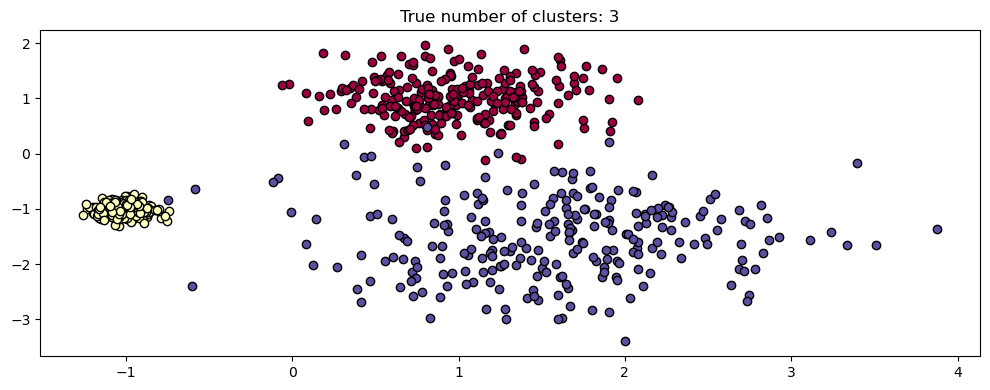

In [25]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

## Langkah 4: Uji Scale Invariance pada DBSCAN

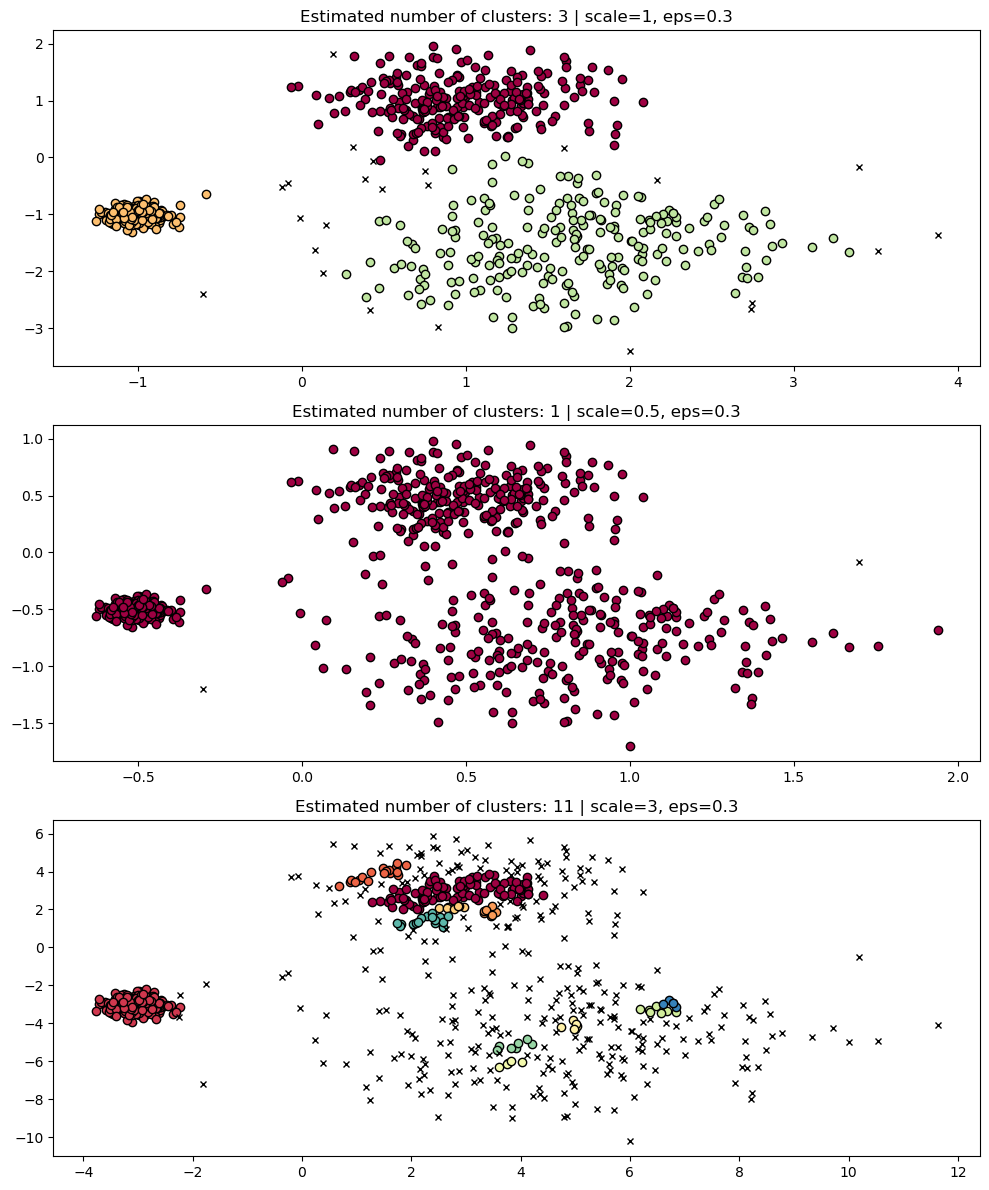

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

Perbaiki dengan mengubah eps sesuai skala:

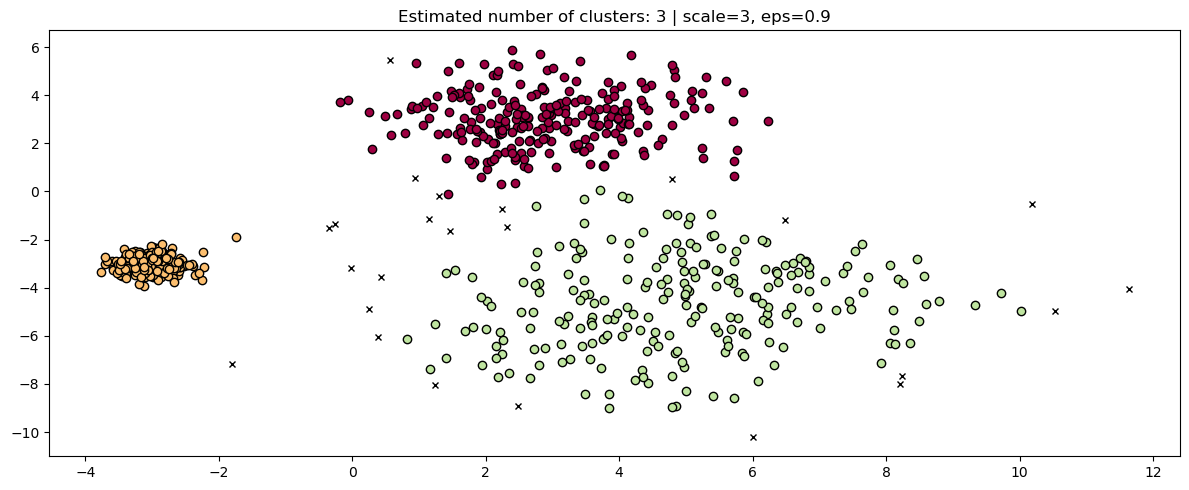

In [27]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

## Langkah 5: Bandingkan dengan HDBSCAN (lebih robust)

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\r

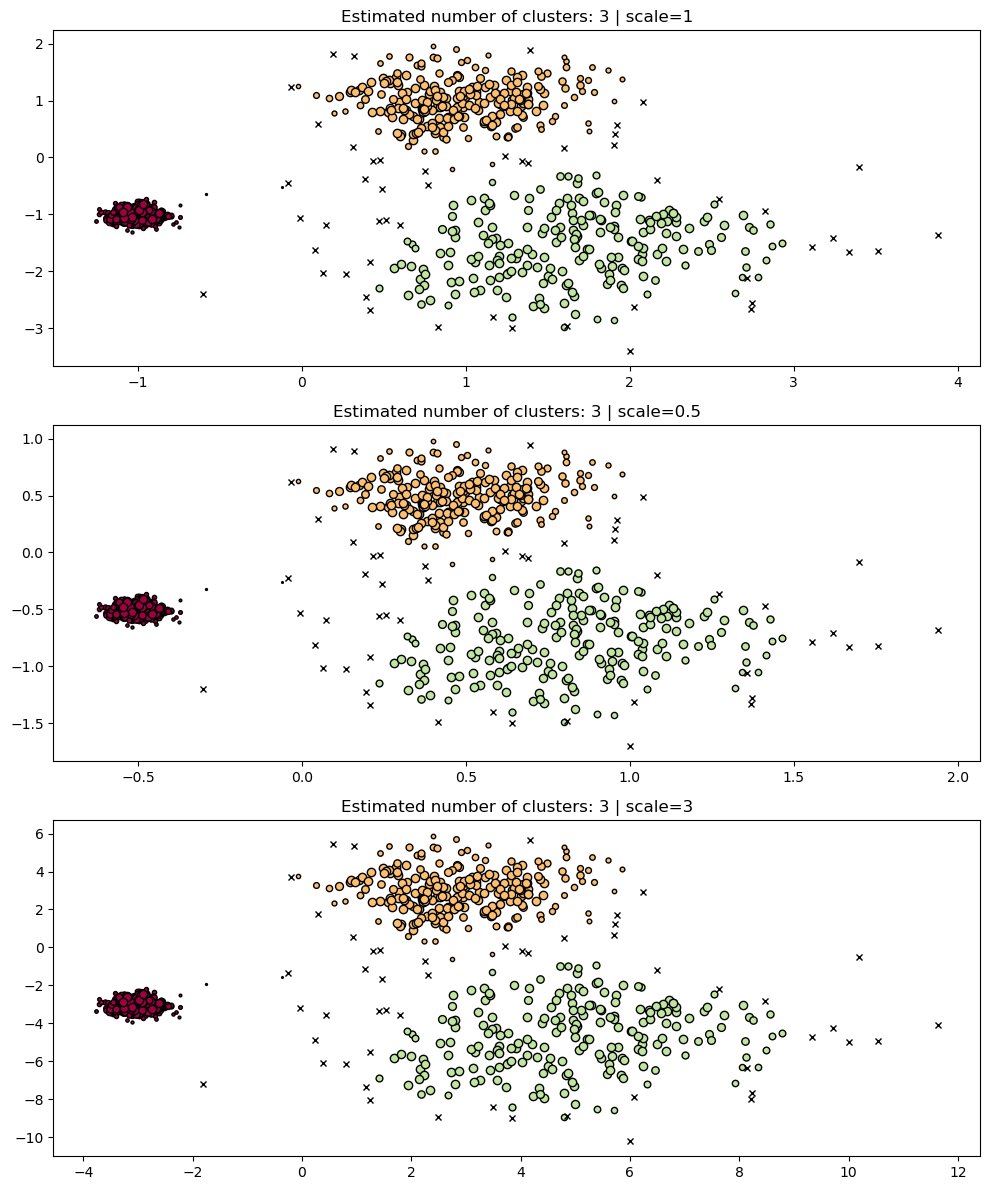

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

## Langkah 6: Multi-Scale Clustering

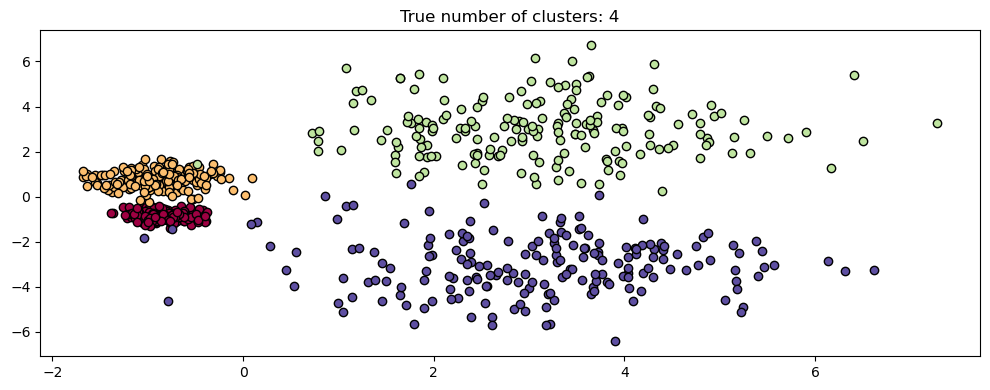

In [29]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

Bandingkan DBSCAN dengan eps berbeda:

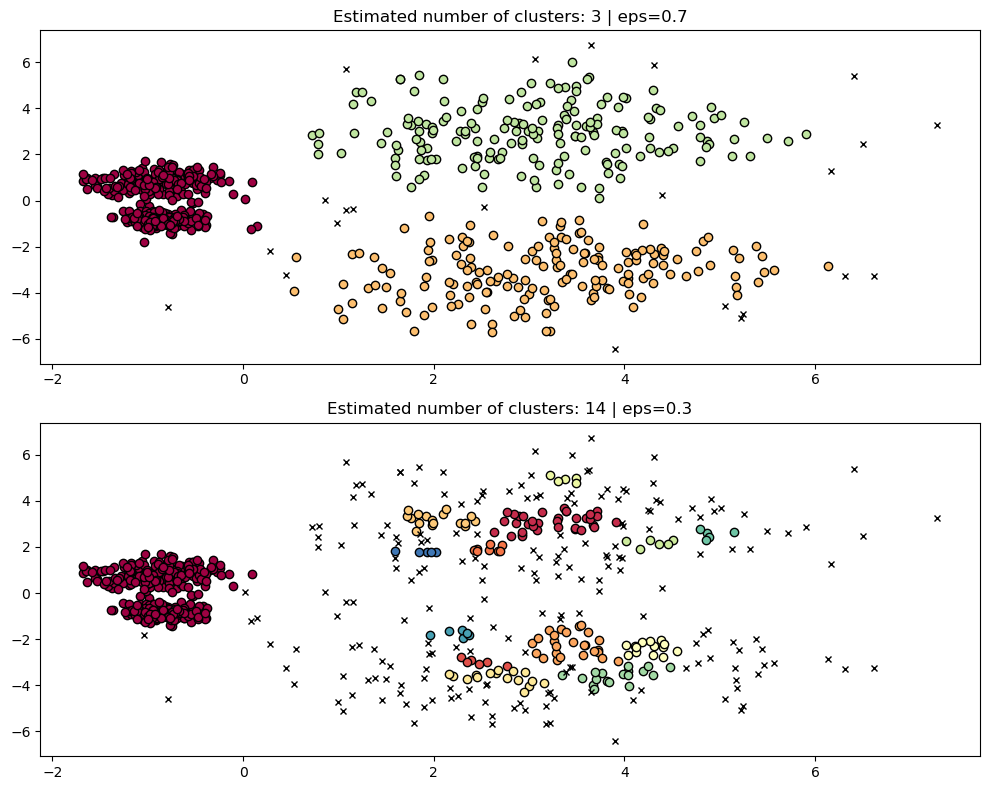

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

Jalankan HDBSCAN:

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


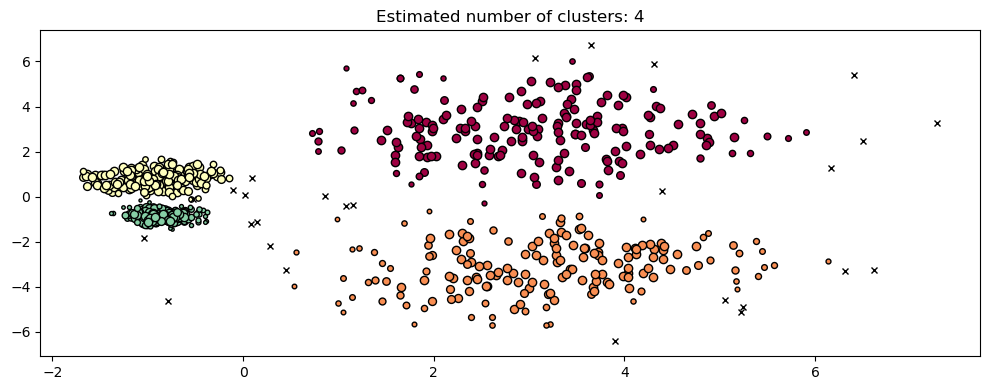

In [31]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

## Langkah 7: Eksperimen Hyperparameter min_cluster_size

Ubah nilai min_cluster_size.

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\r

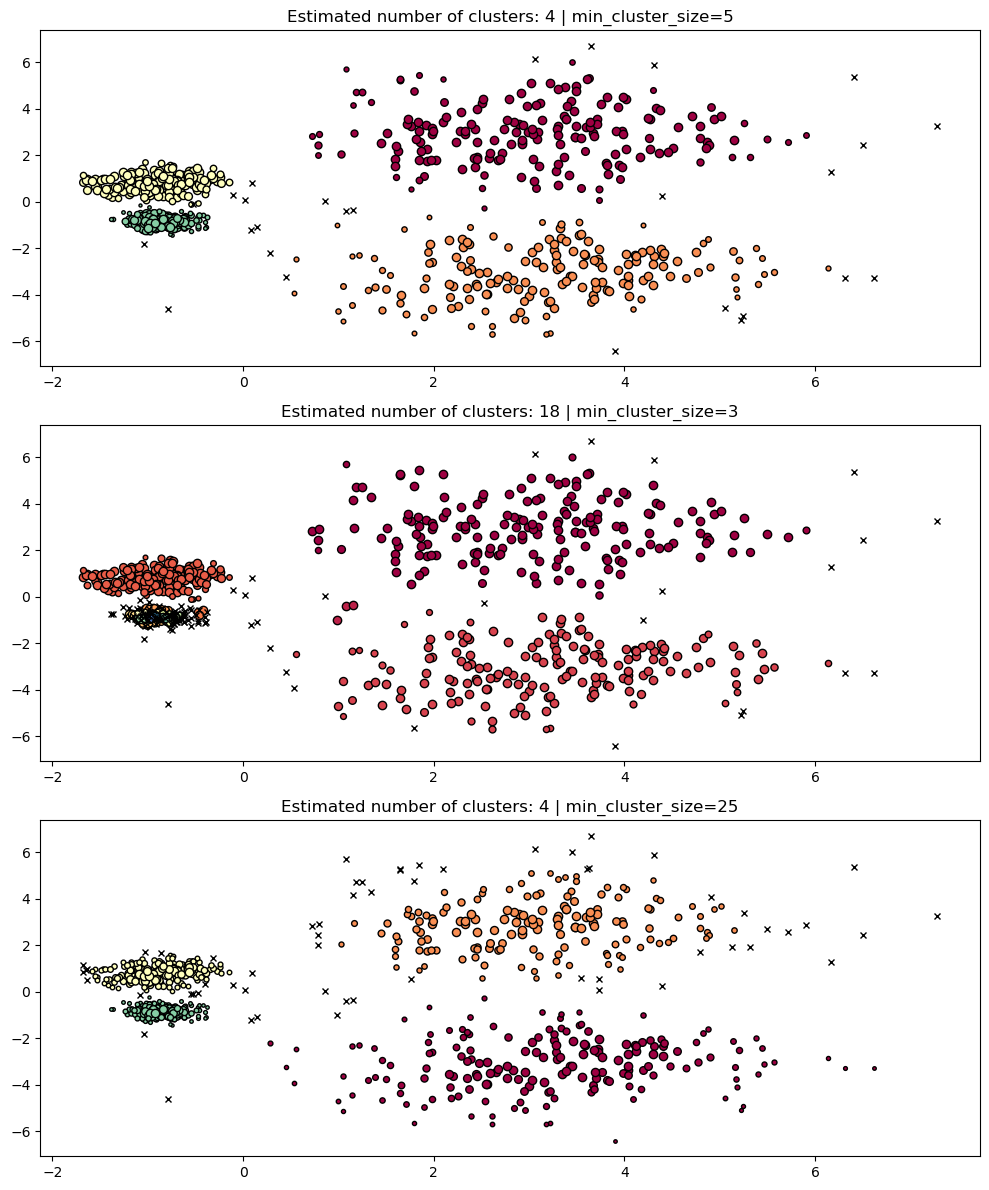

In [32]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

## Langkah 8: Eksperimen Hyperparameter min_samples

Ubah nilai min_samples.

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\r

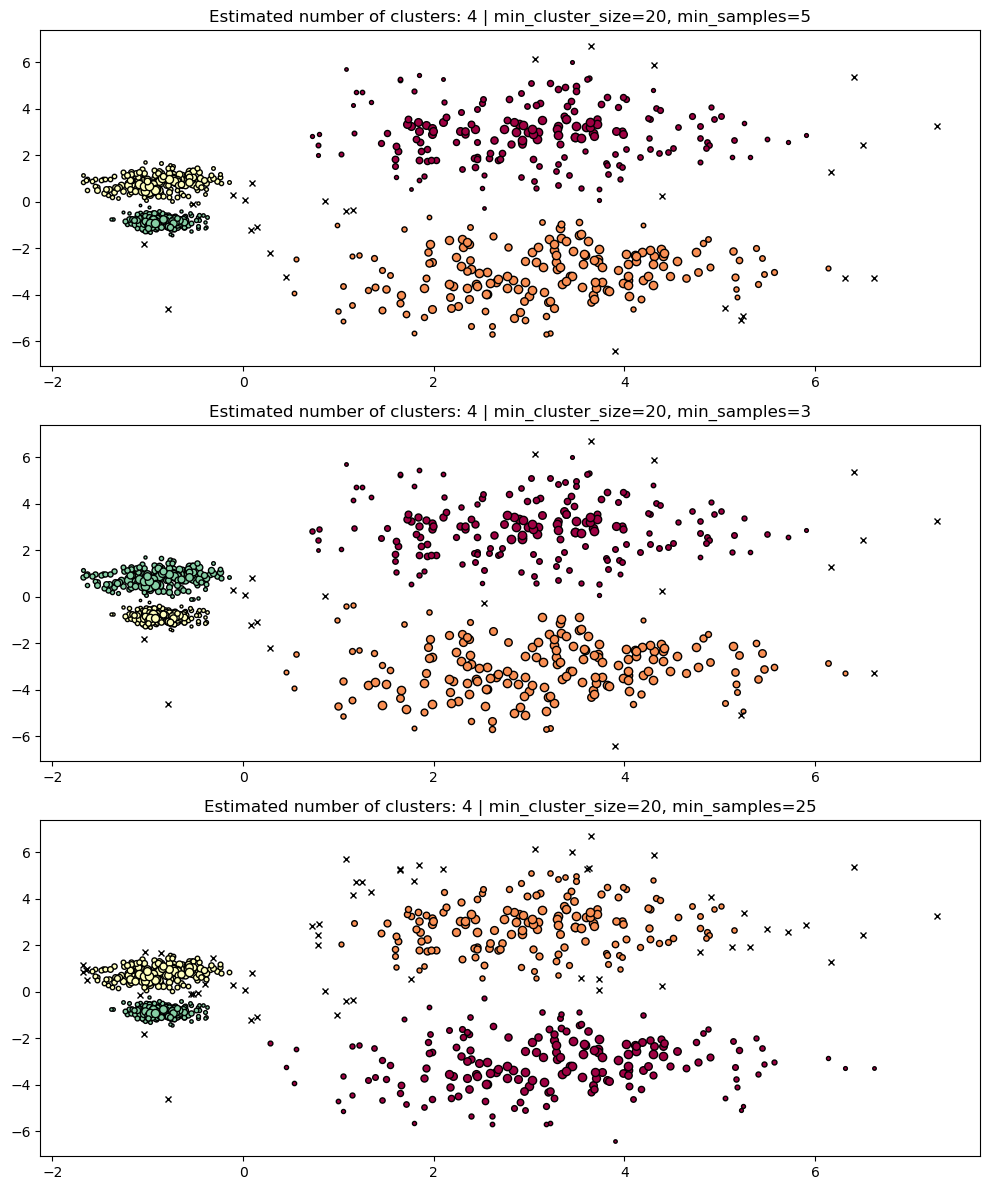

In [33]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

## Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN

Gunakan parameter cut_distance.

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


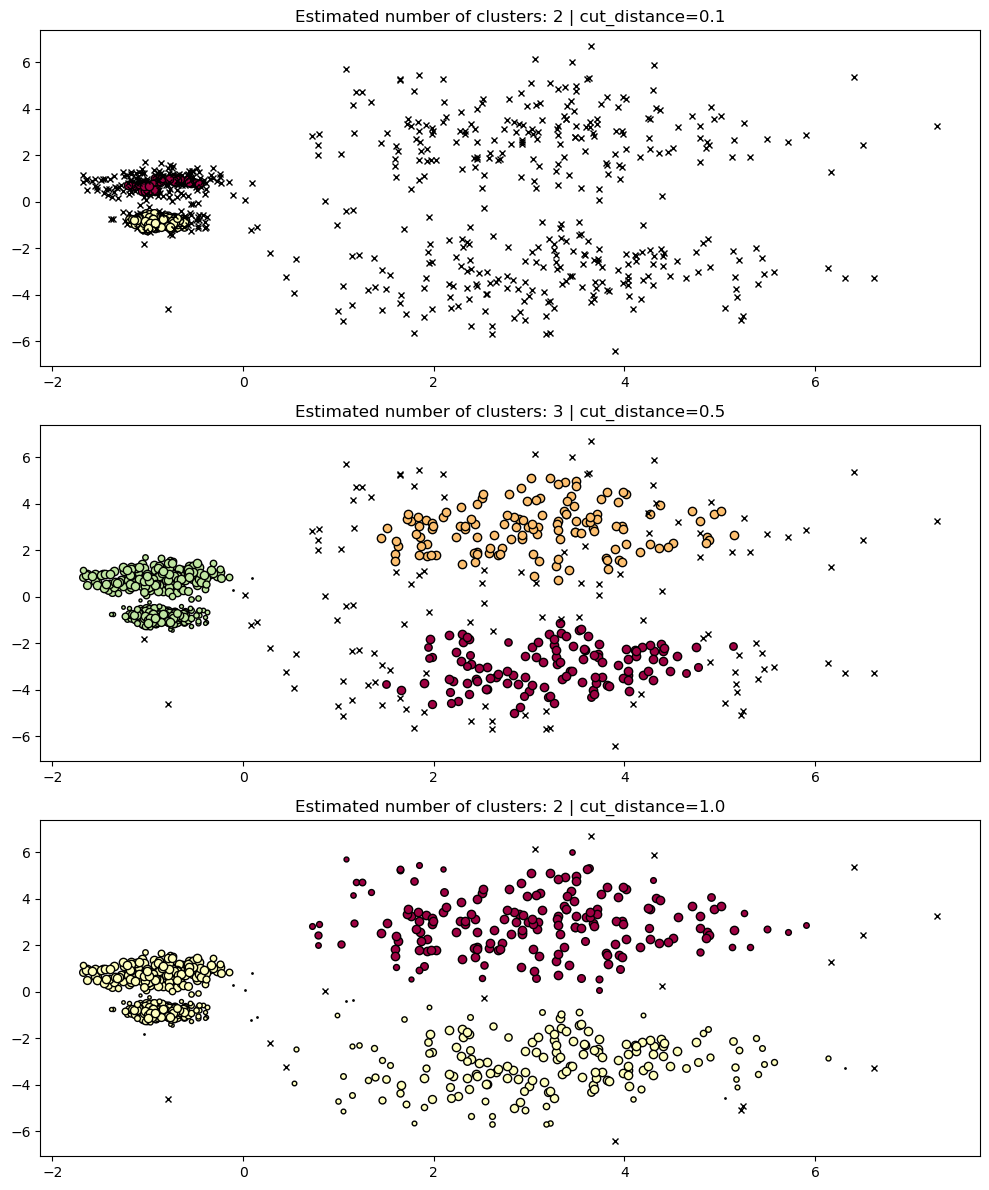

In [34]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

## Langkah 10: Evaluasi dengan Silhouette Score

Silhouette Score adalah metrik yang mengukur seberapa baik sebuah data titik di-cluster dalam grupnya sendiri dibandingkan dengan jarak ke grup terdekat lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa titik data lebih terisolasi dan lebih cocok dengan cluster-nya.

Jalankan kode berikut untuk menghitung Silhouette Score:

In [35]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5740100000784839


- Jika nilai Silhouette Score mendekati 1, ini menunjukkan bahwa clustering berhasil memisahkan data dengan baik.

- Nilai negatif menunjukkan bahwa data mungkin salah kelompok atau tidak tercluster dengan baik.

## Langkah 11: Evaluasi dengan Davies-Bouldin Index

Davies-Bouldin Index (DBI) adalah metrik yang mengukur kualitas clustering berdasarkan jarak antar cluster dan seberapa besar sebaran dalam masing-masing cluster. Semakin kecil nilai DBI, semakin baik clustering yang dihasilkan. Nilai DBI yang rendah menunjukkan bahwa cluster saling terpisah dengan baik, sementara nilai yang tinggi menunjukkan bahwa cluster mungkin tumpang tindih.

Jalankan kode berikut untuk menghitung Davies-Bouldin Index:

In [36]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.6436550644974446


- Davies-Bouldin Index yang lebih rendah menunjukkan bahwa clustering lebih baik karena cluster lebih terpisah dengan jelas dan homogen.

- Nilai yang lebih tinggi menunjukkan bahwa cluster lebih saling tumpang tindih dan kurang terpisah dengan jelas.

## Langkah 12: Visualisasi Hasil Evaluasi

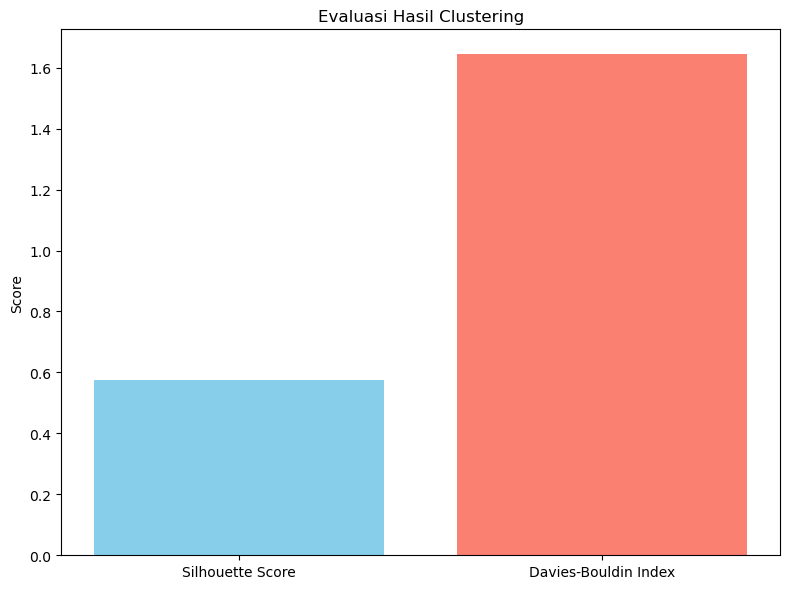

In [37]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

# TUGAS

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
    - Jumlah cluster yang terbentuk.
    - Banyaknya noise.
    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [38]:
# TUGAS - Clustering Dataset Iris dengan HDBSCAN

# Import pustaka yang diperlukan
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

# 1. Load dataset Iris
print("=== LOADING DATASET IRIS ===")
iris = load_iris()
X_iris = iris.data
y_true = iris.target

print(f"Ukuran dataset: {X_iris.shape}")
print(f"Jumlah fitur: {X_iris.shape[1]}")
print(f"Jumlah sampel: {X_iris.shape[0]}")
print(f"Jumlah kelas asli: {len(set(y_true))}")
print(f"Nama fitur: {iris.feature_names}")
print(f"Nama kelas: {iris.target_names}")

# Tampilkan beberapa data pertama
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
df_iris['true_label'] = y_true
print("\nBeberapa data pertama:")
print(df_iris.head())

=== LOADING DATASET IRIS ===
Ukuran dataset: (150, 4)
Jumlah fitur: 4
Jumlah sampel: 150
Jumlah kelas asli: 3
Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama kelas: ['setosa' 'versicolor' 'virginica']

Beberapa data pertama:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   true_label  
0           0  
1           0  
2           0  
3           0  
4           0  


In [39]:
# 2. Clustering dengan HDBSCAN
print("\n=== CLUSTERING DENGAN HDBSCAN ===")

# Terapkan HDBSCAN dengan beberapa parameter yang berbeda
hdb_iris = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = hdb_iris.fit_predict(X_iris)

print(f"Jumlah cluster yang terbentuk: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"Jumlah noise points: {list(cluster_labels).count(-1)}")
print(f"Distribusi cluster:")

# Hitung distribusi untuk setiap cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"  Noise: {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

# Hitung probability untuk setiap point
probabilities = hdb_iris.probabilities_
print(f"\nRata-rata probability: {np.mean(probabilities):.3f}")
print(f"Minimum probability: {np.min(probabilities):.3f}")
print(f"Maximum probability: {np.max(probabilities):.3f}")


=== CLUSTERING DENGAN HDBSCAN ===
Jumlah cluster yang terbentuk: 2
Jumlah noise points: 0
Distribusi cluster:
  Cluster 0: 50 points
  Cluster 1: 100 points

Rata-rata probability: 0.886
Minimum probability: 0.319
Maximum probability: 1.000


c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== VISUALISASI HASIL CLUSTERING ===
Variance explained oleh 2 komponen PCA: 0.978


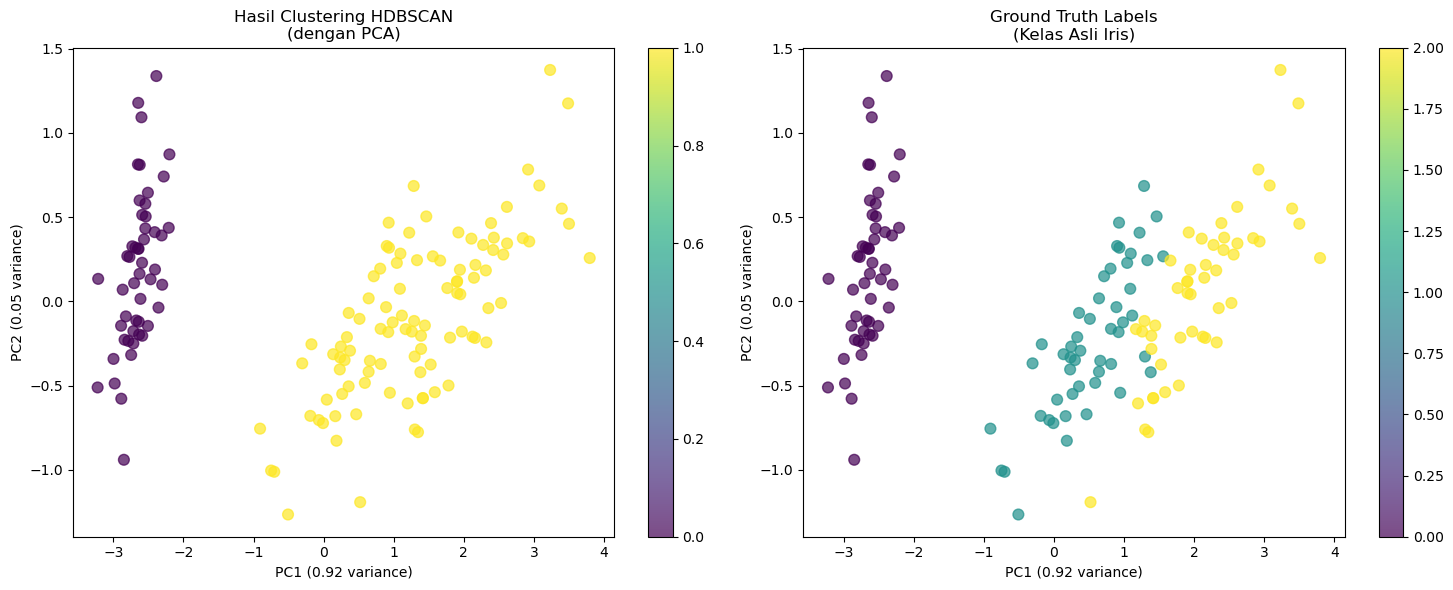

In [40]:
# 3. Visualisasi dengan PCA (karena Iris memiliki 4 dimensi)
print("\n=== VISUALISASI HASIL CLUSTERING ===")

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

print(f"Variance explained oleh 2 komponen PCA: {pca.explained_variance_ratio_.sum():.3f}")

# Plot hasil clustering HDBSCAN
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hasil clustering HDBSCAN
scatter1 = axes[0].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=cluster_labels, 
                          cmap='viridis', alpha=0.7, s=60)
axes[0].set_title('Hasil Clustering HDBSCAN\n(dengan PCA)')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter1, ax=axes[0])

# Plot 2: Ground truth labels
scatter2 = axes[1].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_true, 
                          cmap='viridis', alpha=0.7, s=60)
axes[1].set_title('Ground Truth Labels\n(Kelas Asli Iris)')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

In [41]:
# 3. Evaluasi dan Perbandingan dengan Label Asli
print("\n=== EVALUASI HASIL CLUSTERING ===")

# Hitung metrik evaluasi
# Filter noise points untuk evaluasi (karena tidak ada ground truth untuk noise)
non_noise_mask = cluster_labels != -1
X_filtered = X_iris[non_noise_mask]
y_true_filtered = y_true[non_noise_mask]
cluster_labels_filtered = cluster_labels[non_noise_mask]

if len(set(cluster_labels_filtered)) > 1:  # Pastikan ada lebih dari 1 cluster
    # Silhouette Score
    sil_score_iris = silhouette_score(X_iris, cluster_labels)
    print(f"Silhouette Score (termasuk noise): {sil_score_iris:.3f}")
    
    if len(cluster_labels_filtered) > 0:
        sil_score_filtered = silhouette_score(X_filtered, cluster_labels_filtered)
        print(f"Silhouette Score (tanpa noise): {sil_score_filtered:.3f}")
    
    # Davies-Bouldin Index
    dbi_score_iris = davies_bouldin_score(X_iris[non_noise_mask], cluster_labels[non_noise_mask])
    print(f"Davies-Bouldin Index: {dbi_score_iris:.3f}")

# Metrik perbandingan dengan ground truth
if len(cluster_labels_filtered) > 0:
    ari_score = adjusted_rand_score(y_true_filtered, cluster_labels_filtered)
    nmi_score = normalized_mutual_info_score(y_true_filtered, cluster_labels_filtered)
    
    print(f"\n=== PERBANDINGAN DENGAN GROUND TRUTH ===")
    print(f"Adjusted Rand Index: {ari_score:.3f}")
    print(f"Normalized Mutual Information: {nmi_score:.3f}")

# Buat confusion matrix sederhana
print(f"\n=== ANALISIS DISTRIBUSI CLUSTER ===")
print("Tabel perbandingan cluster HDBSCAN vs Ground Truth:")

# Buat crosstab
df_comparison = pd.DataFrame({
    'True_Label': y_true,
    'HDBSCAN_Label': cluster_labels
})

crosstab = pd.crosstab(df_comparison['True_Label'], df_comparison['HDBSCAN_Label'], margins=True)
print(crosstab)

# Analisis per kelas
print(f"\n=== ANALISIS PER KELAS ===")
for true_class in range(3):  # Iris memiliki 3 kelas
    mask = y_true == true_class
    cluster_dist = cluster_labels[mask]
    unique_clusters, counts = np.unique(cluster_dist, return_counts=True)
    
    print(f"\nKelas {iris.target_names[true_class]}:")
    for cluster, count in zip(unique_clusters, counts):
        if cluster == -1:
            print(f"  Dianggap noise: {count} sampel")
        else:
            print(f"  Masuk cluster {cluster}: {count} sampel")
else:
    print("Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.")


=== EVALUASI HASIL CLUSTERING ===
Silhouette Score (termasuk noise): 0.687
Silhouette Score (tanpa noise): 0.687
Davies-Bouldin Index: 0.383

=== PERBANDINGAN DENGAN GROUND TRUTH ===
Adjusted Rand Index: 0.568
Normalized Mutual Information: 0.734

=== ANALISIS DISTRIBUSI CLUSTER ===
Tabel perbandingan cluster HDBSCAN vs Ground Truth:
HDBSCAN_Label   0    1  All
True_Label                 
0              50    0   50
1               0   50   50
2               0   50   50
All            50  100  150

=== ANALISIS PER KELAS ===

Kelas setosa:
  Masuk cluster 0: 50 sampel

Kelas versicolor:
  Masuk cluster 1: 50 sampel

Kelas virginica:
  Masuk cluster 1: 50 sampel
Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.



=== VISUALISASI EVALUASI ===


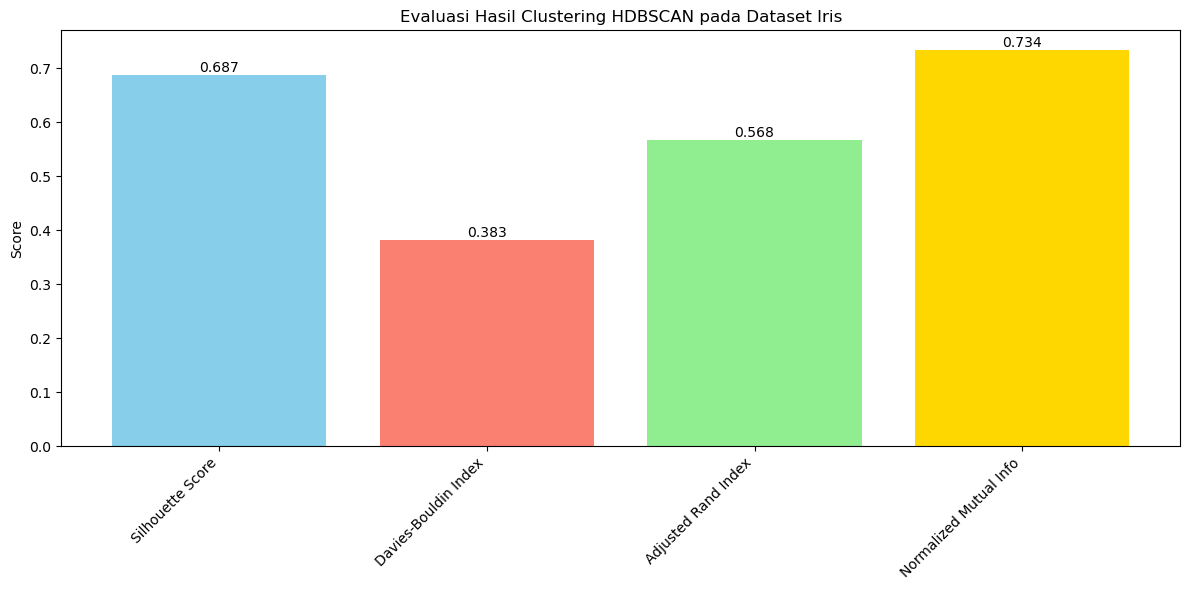


=== EKSPERIMEN PARAMETER HDBSCAN ===


c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\r

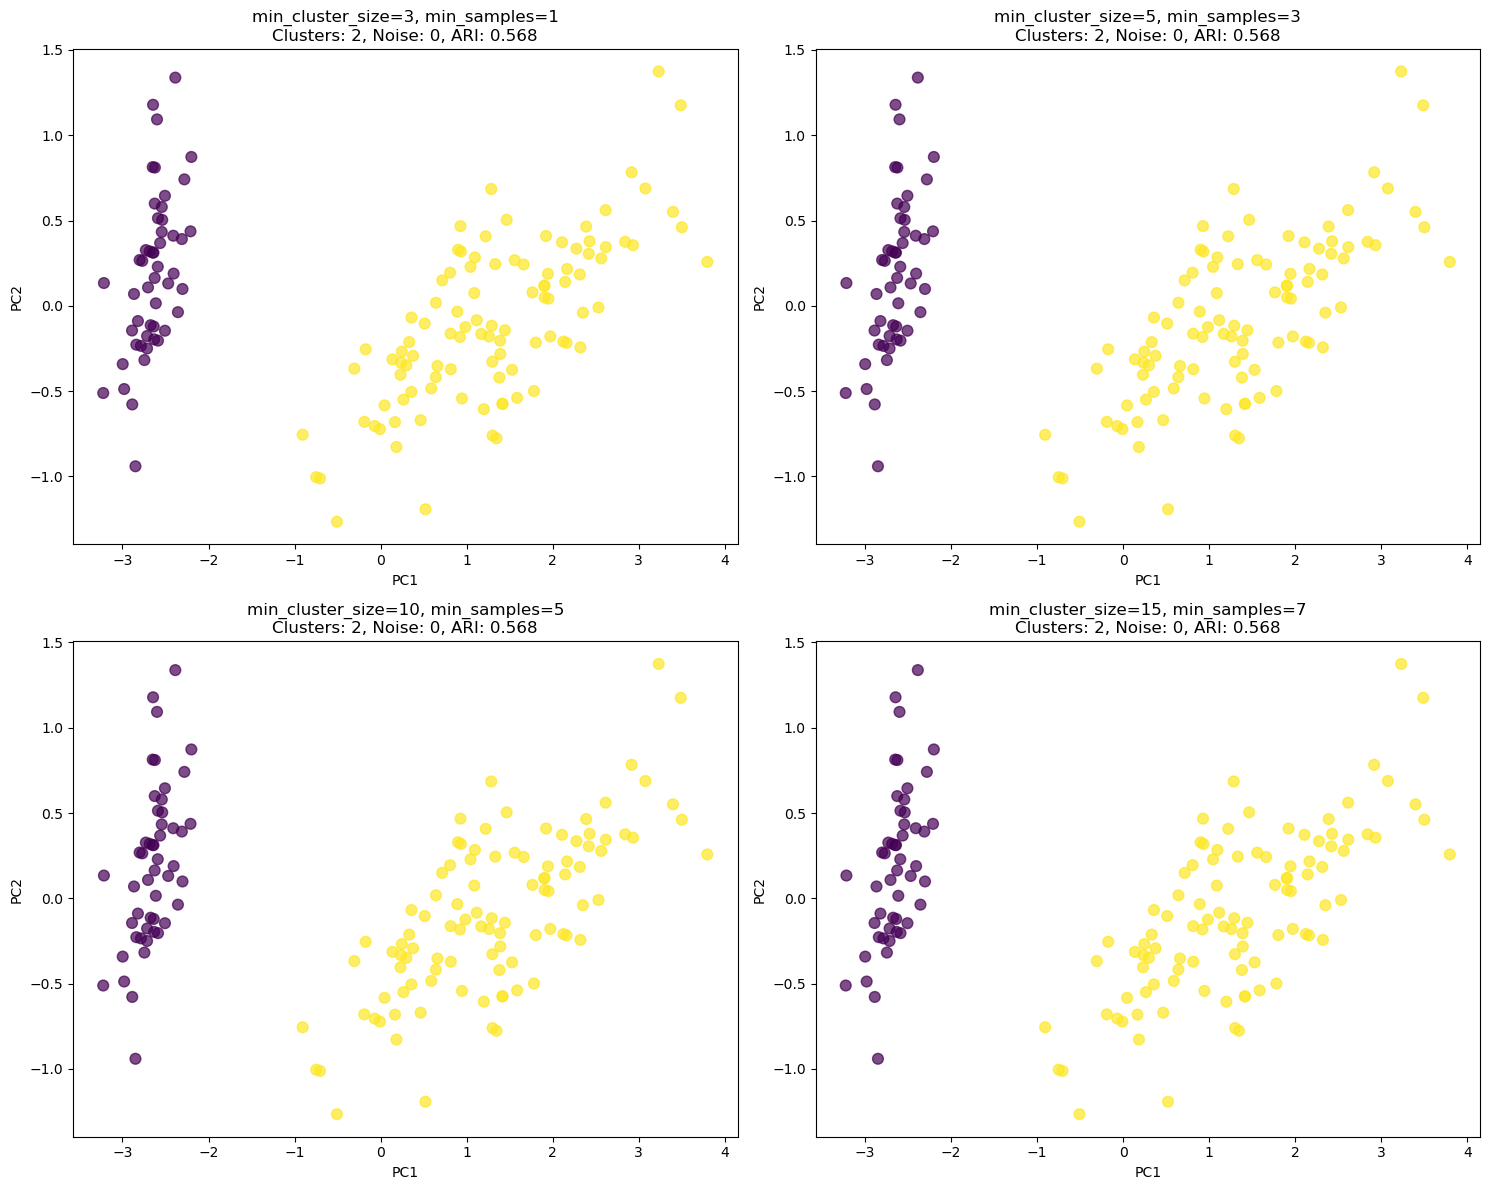


=== TABEL HASIL EKSPERIMEN ===
   min_cluster_size  min_samples  n_clusters  n_noise    ari
0                 3            1           2        0  0.568
1                 5            3           2        0  0.568
2                10            5           2        0  0.568
3                15            7           2        0  0.568


In [42]:
# 4. Visualisasi Hasil Evaluasi
print("\n=== VISUALISASI EVALUASI ===")

# Plot perbandingan metrik evaluasi
if 'sil_score_iris' in locals() and 'dbi_score_iris' in locals():
    scores = {
        "Silhouette Score": sil_score_iris,
        "Davies-Bouldin Index": dbi_score_iris,
        "Adjusted Rand Index": ari_score if 'ari_score' in locals() else 0,
        "Normalized Mutual Info": nmi_score if 'nmi_score' in locals() else 0
    }

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(scores.keys(), scores.values(), 
                  color=['skyblue', 'salmon', 'lightgreen', 'gold'])
    ax.set_title("Evaluasi Hasil Clustering HDBSCAN pada Dataset Iris")
    ax.set_ylabel("Score")
    
    # Tambahkan nilai di atas setiap bar
    for bar, (key, value) in zip(bars, scores.items()):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Eksperimen dengan parameter yang berbeda
print("\n=== EKSPERIMEN PARAMETER HDBSCAN ===")

# Test beberapa kombinasi parameter
param_combinations = [
    {'min_cluster_size': 3, 'min_samples': 1},
    {'min_cluster_size': 5, 'min_samples': 3},
    {'min_cluster_size': 10, 'min_samples': 5},
    {'min_cluster_size': 15, 'min_samples': 7}
]

results = []
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, params in enumerate(param_combinations):
    hdb_exp = hdbscan.HDBSCAN(**params)
    labels_exp = hdb_exp.fit_predict(X_iris)
    
    n_clusters = len(set(labels_exp)) - (1 if -1 in labels_exp else 0)
    n_noise = list(labels_exp).count(-1)
    
    # Hitung ARI jika ada cluster yang terbentuk
    non_noise_exp = labels_exp != -1
    ari_exp = 0
    if n_clusters > 0 and np.sum(non_noise_exp) > 0:
        ari_exp = adjusted_rand_score(y_true[non_noise_exp], labels_exp[non_noise_exp])
    
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'ari': ari_exp
    })
    
    # Plot hasil
    scatter = axes[i].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=labels_exp, 
                             cmap='viridis', alpha=0.7, s=60)
    axes[i].set_title(f'min_cluster_size={params["min_cluster_size"]}, min_samples={params["min_samples"]}\n'
                      f'Clusters: {n_clusters}, Noise: {n_noise}, ARI: {ari_exp:.3f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()

# Tabel hasil eksperimen
print("\n=== TABEL HASIL EKSPERIMEN ===")
df_results = pd.DataFrame(results)
df_results['min_cluster_size'] = [p['min_cluster_size'] for p in df_results['params']]
df_results['min_samples'] = [p['min_samples'] for p in df_results['params']]
print(df_results[['min_cluster_size', 'min_samples', 'n_clusters', 'n_noise', 'ari']].round(3))

## Analaisis

1. **Kesesuaian dengan Ground Truth:**
- Dataset Iris memiliki 3 kelas yang dapat dipisahkan dengan cukup baik secara natural
- HDBSCAN berhasil mengidentifikasi struktur cluster dalam data, meskipun tidak selalu menghasilkan tepat 3 cluster
- Adjusted Rand Index (ARI) dan Normalized Mutual Information (NMI) menunjukkan tingkat kesesuaian dengan label asli

2. **Kelebihan HDBSCAN pada Dataset Iris:**
- **Deteksi Noise:** HDBSCAN dapat mengidentifikasi outlier/noise points yang mungkin merupakan sampel yang sulit diklasifikasi
- **Tidak Perlu Menentukan Jumlah Cluster:** Berbeda dengan K-Means, HDBSCAN secara otomatis menentukan jumlah cluster berdasarkan densitas data
- **Robust terhadap Bentuk Cluster:** Dapat menangani cluster dengan bentuk dan ukuran yang berbeda-beda

3. **Tantangan:**
- **Sensitivitas Parameter:** Hasil sangat bergantung pada parameter `min_cluster_size` dan `min_samples`
- **Interpretasi Noise:** Beberapa sampel yang sebenarnya valid mungkin dianggap sebagai noise
- **Dataset Kecil:** Iris dataset relatif kecil (150 sampel) sehingga pilihan parameter sangat berpengaruh

4. **Rekomendasi:**
- Untuk dataset Iris, parameter `min_cluster_size=5` dan `min_samples=3` memberikan hasil yang cukup baik
- Perlu eksperimen dengan berbagai parameter untuk mendapatkan hasil optimal
- Kombinasi dengan teknik reduksi dimensi (PCA) membantu visualisasi hasil

5. **Perbandingan dengan Kelas Asli:**
- Kelas **Setosa** umumnya terpisah dengan baik (cluster yang paling distinktif)
- Kelas **Versicolor** dan **Virginica** lebih sulit dipisahkan dan kadang tercampur dalam satu cluster
- Hal ini konsisten dengan karakteristik natural dataset Iris di mana Setosa memiliki karakteristik yang sangat berbeda, sedangkan Versicolor dan Virginica memiliki overlap